# SuperConducting Material Critical Temperature
* __Introduction__: Superconducting materials - materials that conduct current with zero resistance - have significant practical applications. The best known application is in the Magnetic Resonance Imaging (MRI) systems widely employed by health care professionals for detailed internal body imaging. Other prominent applications include the superconducting coils used to maintain high magnetic fields in the Large Hadron Collider at CERN, where the existence of Higgs Boson was recently confirmed.
* __Data__: The superconductor data comes from the Superconducting Material Database maintained by Japan’s National Institute for Materials Science (NIMS) at https://dice.nims.go.jp/news/2022/12/20221216-en.html.
* __About Data__: The data is splitted into two files `train.csv` and `unique_m.csv`, The `train.csv` file contains all the chemical property(atomic_mass, Entropy, etc) of the compound from which Super Conducting Material is made and `unique_m.csv` file contains all the amount of perodic elements used in make Super Conducting Material.
* __Main Chemical Properties__: The data is measured properties of 21,563 superconductors. There are 81 predictors in this data. The target is `critical_temp` which is critical temperature of Superconductor. The 81 predictors are engineered from 9 basic properties as follow:
    1. Number of Elements
    2. Atomic Mass
    3. First Ionization Energy
    4. Atomic Radius
    5. Density
    6. Electron Affinity
    7. Thermal Conductivity
    8. Valence
    9. Fushion Heat
    
    *The rest of columns like wtd, gmean, entropy are statistical measure.*
* __Aim__: Aim of this Project is predict the critical temperature of the Super Conducting Material based on its chemical properties.

In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('./superconduct/train.csv')
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
elements = pd.read_csv('./superconduct/unique_m.csv')
elements.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
data.shape

(21263, 82)

In [6]:
elements.shape

(21263, 88)

Both DataFrame contains same number of rows, which I describe above.

### Checking for Missing Values

In [7]:
_ = data.isna().sum()
print(_, '\n\n')

print('#'*40)
print('Columns with Missing values:', np.any([_> 0]))
print('#'*40)

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64 


########################################
Columns with Missing values: False
########################################


In [8]:
_ = elements.isna().sum()
print(_, '\n\n')

print('#'*40)
print('Columns with Missing values:', np.any([_> 0]))
print('#'*40)

H                0
He               0
Li               0
Be               0
B                0
                ..
Po               0
At               0
Rn               0
critical_temp    0
material         0
Length: 88, dtype: int64 


########################################
Columns with Missing values: False
########################################


The data does not contains any missing values.

### Statistics
Here I am only taking the some basic properties of this data like:
* Number of Elements
* Atomic Mass
* First Ionization Energy
* Atomic Radius
* Density
* Electron Affinity
* Fusion Heat
* Thermal Conductivity
* Valence

In [9]:
basic_cols = [
    'number_of_elements',
    'mean_atomic_mass', 
    'mean_fie', 
    'mean_atomic_radius', 
    'mean_Density', 
    'mean_ElectronAffinity', 
    'mean_FusionHeat', 
    'mean_ThermalConductivity', 
    'mean_Valence'
    ]

data[basic_cols].describe()

,number_of_elements,mean_atomic_mass,mean_fie,mean_atomic_radius,mean_Density,mean_ElectronAffinity,mean_FusionHeat,mean_ThermalConductivity,mean_Valence
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,769.614748,157.983101,6111.465214,76.879751,14.296113,89.706911,3.198228
std,1.439295,29.676497,87.488694,20.147288,2846.785185,27.701890,11.300188,38.517485,1.044611
min,1.000000,6.941000,375.500000,48.000000,1.429000,1.500000,0.222000,0.026580,1.000000
25%,3.000000,72.458076,723.740000,149.333333,4513.500000,62.090000,7.588667,61.000000,2.333333
50%,4.000000,84.922750,764.900000,160.250000,5329.085800,73.100000,9.304400,96.504430,2.833333
75%,5.000000,100.404410,796.320000,169.857143,6728.000000,85.504167,17.114444,111.005316,4.000000
max,9.000000,208.980400,1313.100000,298.000000,22590.000000,326.100000,105.000000,332.500000,7.000000


### Visualization of data

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

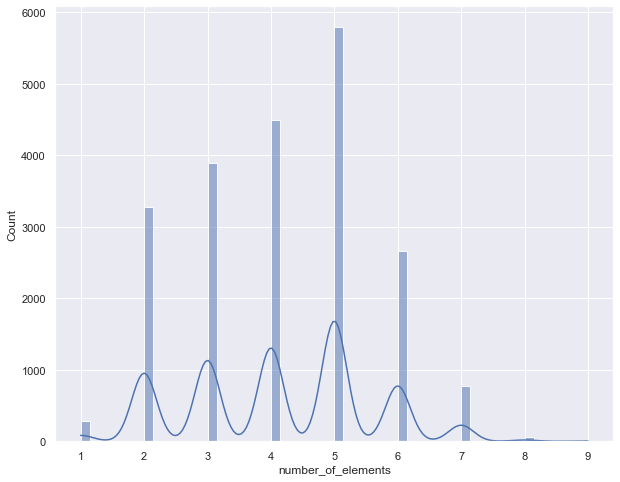

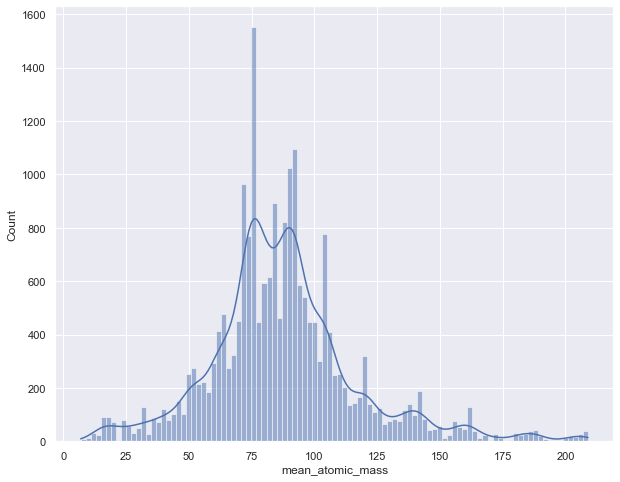

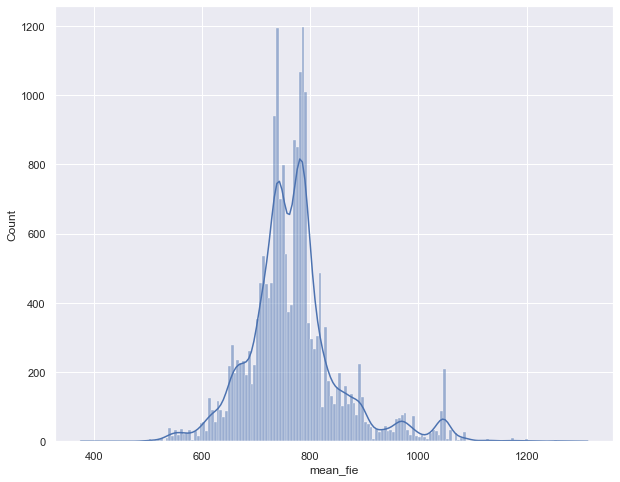

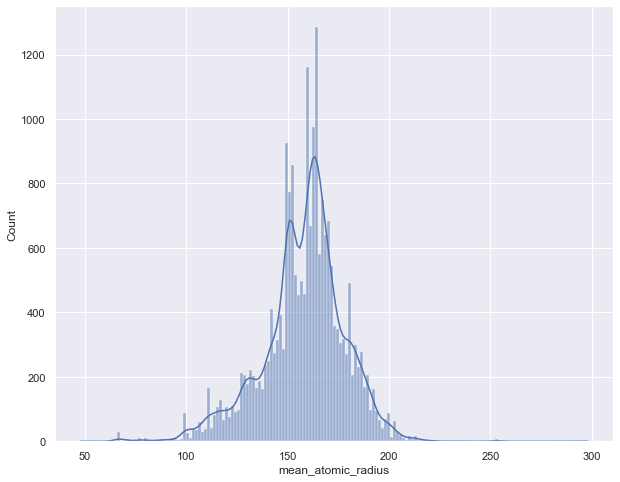

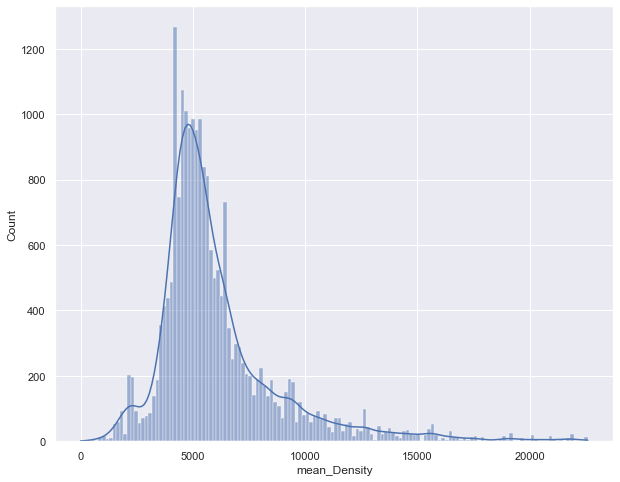

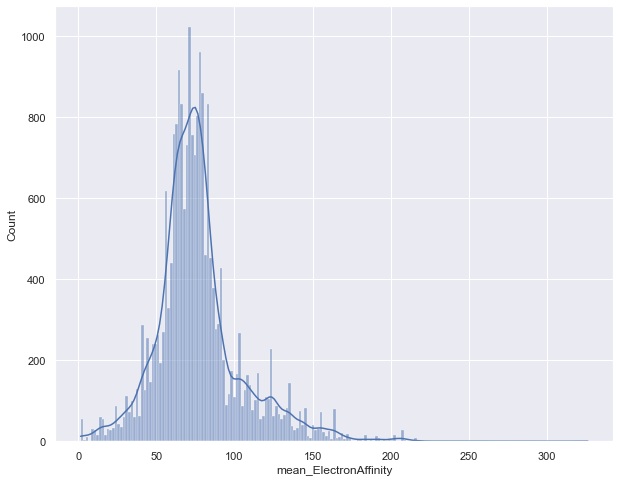

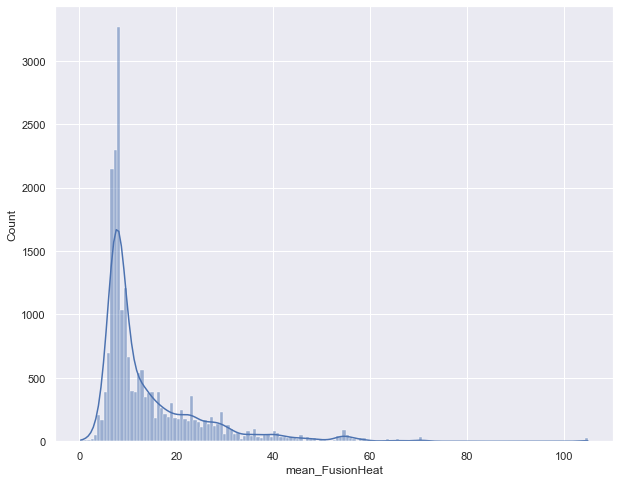

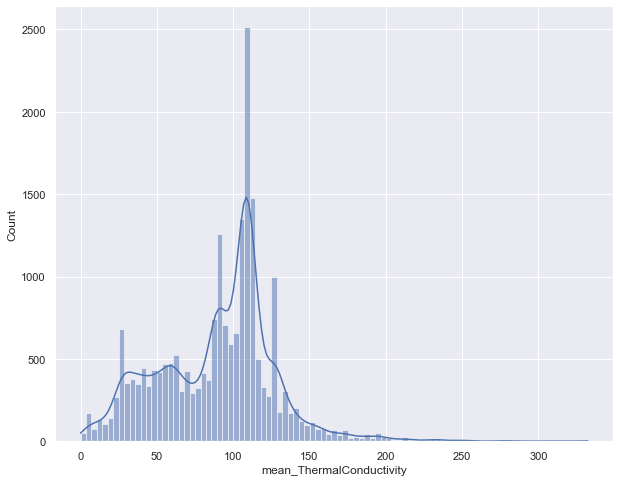

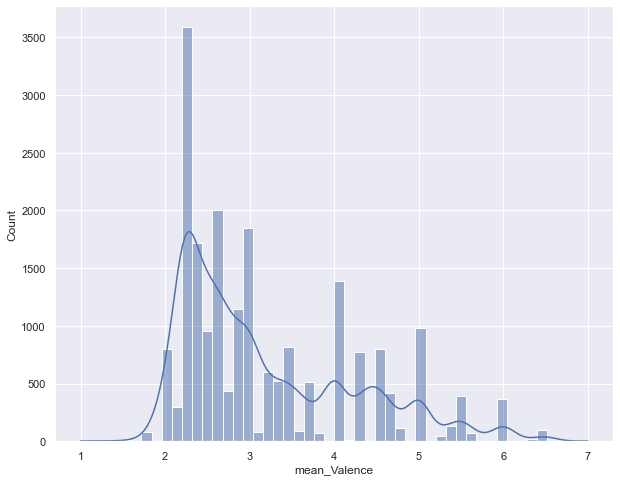

In [11]:
sns.set(rc = {'figure.figsize': (10, 8)})

for col in basic_cols:
    sns.histplot(data,  x = col, kde = True)
    plt.show()

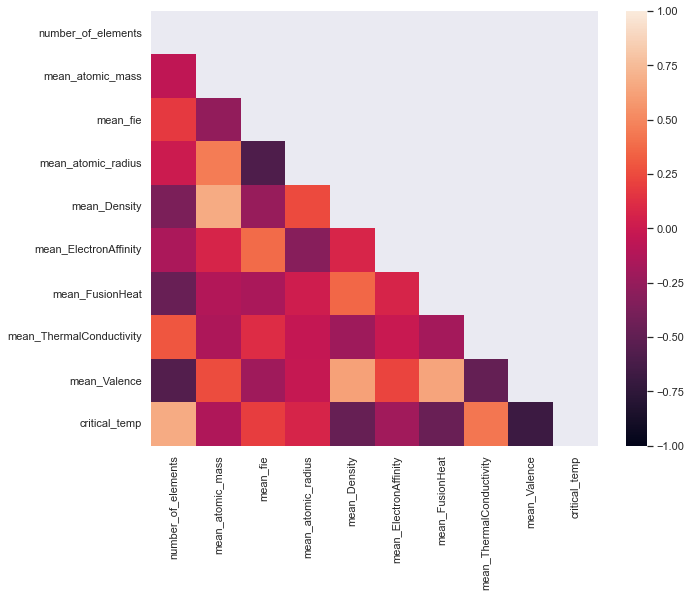

In [15]:
# adding critical temperature to basic columns
_ = basic_cols + ['critical_temp']

corr = data[_].corr(method = 'spearman')

# making a mask array
mask = np.triu(np.ones_like(corr, dtype = np.bool8))

sns.heatmap(corr, mask = mask, vmin = -1, vmax = 1)
plt.show()

Correlation of Basic Properties

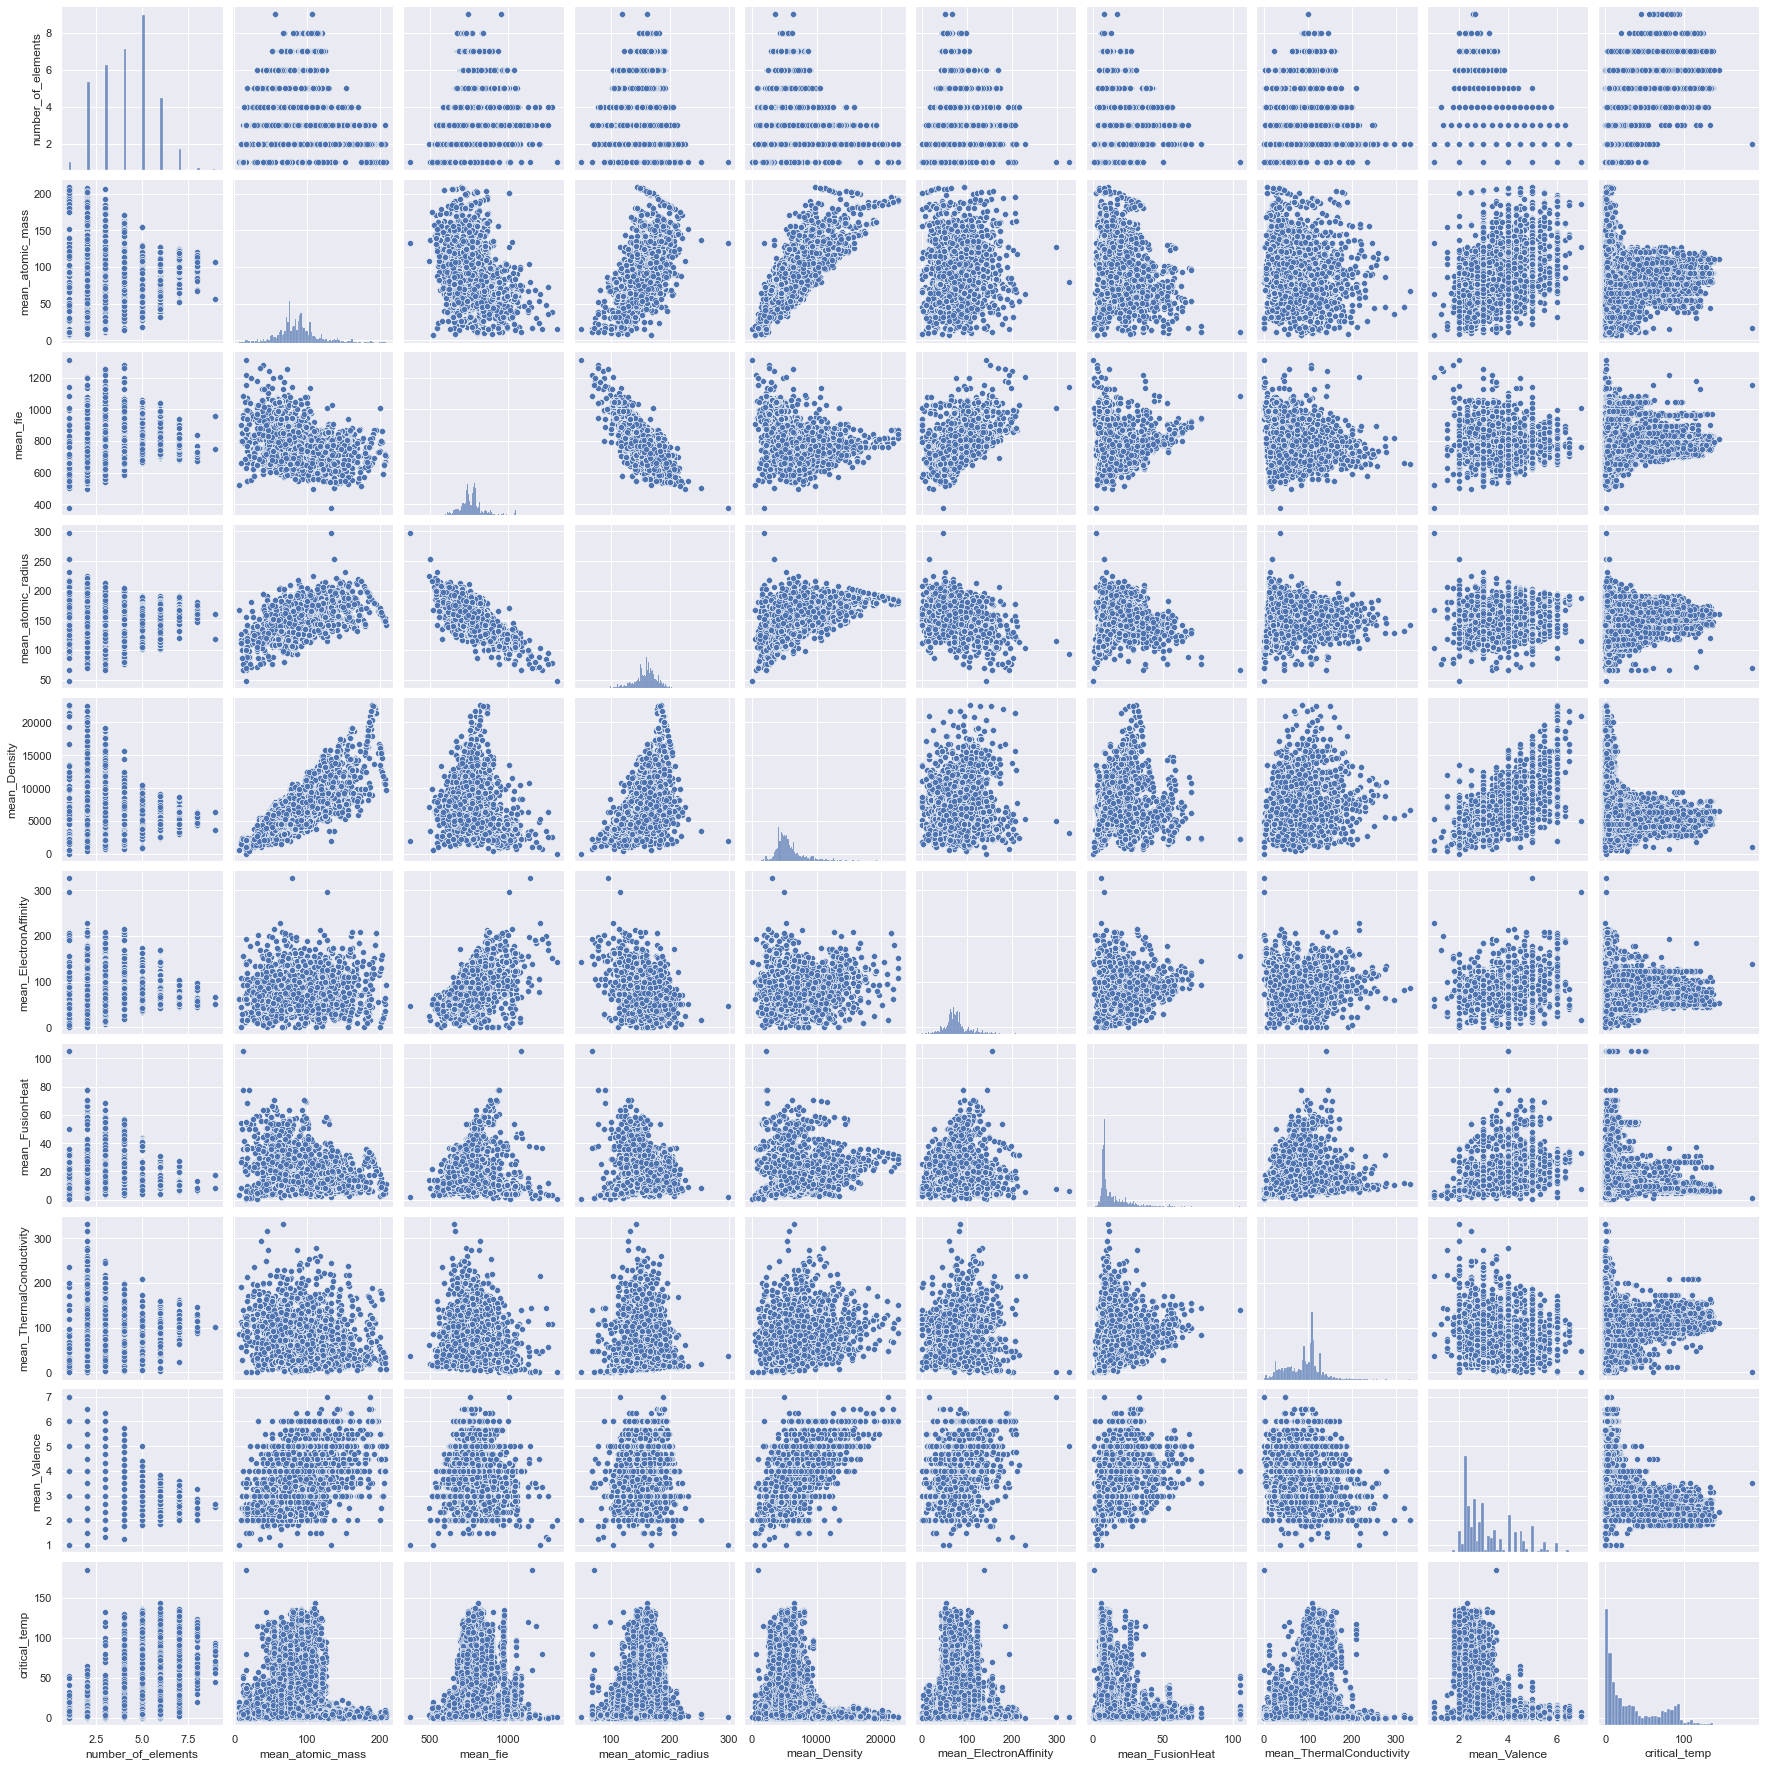

In [14]:
sns.pairplot(data[basic_cols + ['critical_temp']])
plt.show()

Checking whether number of elements effect the critical temperature

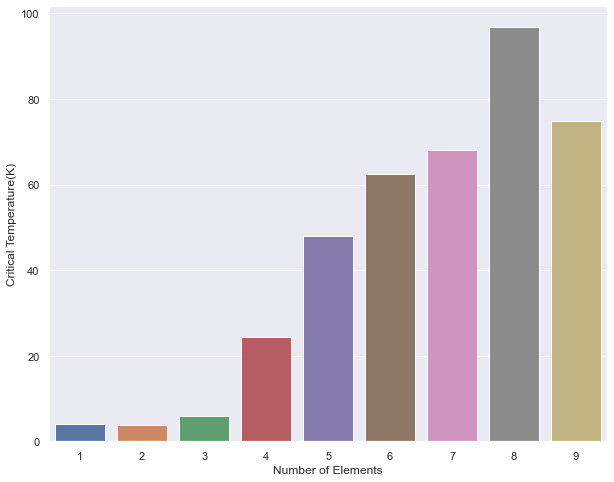

In [27]:
grp_num_elements = data.groupby('number_of_elements')['critical_temp'].median()
sns.barplot(x = grp_num_elements.index, y = grp_num_elements.values)
plt.ylabel('Critical Temperature(K)')
plt.xlabel('Number of Elements')
plt.show()

Higher temperature is better